In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


read data


In [128]:
domestics_tourism = pd.read_csv('domestic-tourists-number-and-spending-by-destination-provinces-2.txt',delimiter=';')
print(len(domestics_tourism))
domestics_tourism.head()


1008


,Date,Indicator,Province,Value
0,2023-01,Tourists Number (Overnight Visitors),Al Bahah,39183.0
1,2022-02,Tourists Number (Overnight Visitors),Al Bahah,37792.0
2,2023-05,Tourists Number (Overnight Visitors),Al Bahah,60160.0
3,2021-09,Tourists Number (Overnight Visitors),Al Bahah,56620.0
4,2022-10,Tourists Number (Overnight Visitors),Al Bahah,31937.0


In [129]:
inbound_tourism = pd.read_csv('inbound-tourists-number-and-spending-by-destination-main-cities-2.txt',delimiter=';')
print(len(inbound_tourism))
inbound_tourism.head()

2362


,Date,Indicator,Province,Destination,value
0,2021-March,Tourists Number (Overnight Visitors),Albaha province,Al Bahah,31.000000
1,2023-May,Tourists Number (Overnight Visitors),Albaha province,Al Bahah,1188.000000
2,2023-October,Tourists Number (Overnight Visitors),Albaha province,Al Bahah,1703.000000
3,2022-November,Tourists Number (Overnight Visitors),Albaha province,Al Bahah,123.146793
4,2023-November,Tourists Number (Overnight Visitors),Albaha province,Al Bahah,415.000000


# In The Domestics Tourism

In [130]:
domestics_tourism.head()

,Date,Indicator,Province,Value
0,2023-01,Tourists Number (Overnight Visitors),Al Bahah,39183.0
1,2022-02,Tourists Number (Overnight Visitors),Al Bahah,37792.0
2,2023-05,Tourists Number (Overnight Visitors),Al Bahah,60160.0
3,2021-09,Tourists Number (Overnight Visitors),Al Bahah,56620.0
4,2022-10,Tourists Number (Overnight Visitors),Al Bahah,31937.0


# split the date into year, month and day

In [131]:
domestics_tourism['year']=domestics_tourism['Date'].apply(lambda x:str(x).split('-')[0])
domestics_tourism['month']=domestics_tourism['Date'].apply(lambda x:str(x).split('-')[1])
domestics_tourism.drop('Date',axis=1,inplace=True)
domestics_tourism.head()

,Indicator,Province,Value,year,month
0,Tourists Number (Overnight Visitors),Al Bahah,39183.0,2023,01
1,Tourists Number (Overnight Visitors),Al Bahah,37792.0,2022,02
2,Tourists Number (Overnight Visitors),Al Bahah,60160.0,2023,05
3,Tourists Number (Overnight Visitors),Al Bahah,56620.0,2021,09
4,Tourists Number (Overnight Visitors),Al Bahah,31937.0,2022,10


# get null vaules

In [132]:
domestics_tourism.isna().sum()

Indicator    0
Province     0
Value        0
year         0
month        0
dtype: int64

# Drop dubplicate rows


In [133]:
domestics_tourism.drop_duplicates(inplace=True)

# remove the outliner

In [134]:
from scipy import stats
domestics_tourism['Z-Score'] = np.abs(stats.zscore(domestics_tourism['Value']))

domestics_tourism = domestics_tourism[domestics_tourism['Z-Score'] <= 3].drop(columns=['Z-Score'])
domestics_tourism.head()

,Indicator,Province,Value,year,month
0,Tourists Number (Overnight Visitors),Al Bahah,39183.0,2023,01
1,Tourists Number (Overnight Visitors),Al Bahah,37792.0,2022,02
2,Tourists Number (Overnight Visitors),Al Bahah,60160.0,2023,05
3,Tourists Number (Overnight Visitors),Al Bahah,56620.0,2021,09
4,Tourists Number (Overnight Visitors),Al Bahah,31937.0,2022,10


In [135]:
domestics_tourism.to_csv("domestics_tourism.csv")

# Domestics Tourism Data visulization

C:\Users\mahmo\AppData\Local\Temp\ipykernel_25628\1045344945.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=domestics_tourism, x="year", y="Value", hue="Province", estimator="sum", ci=None)


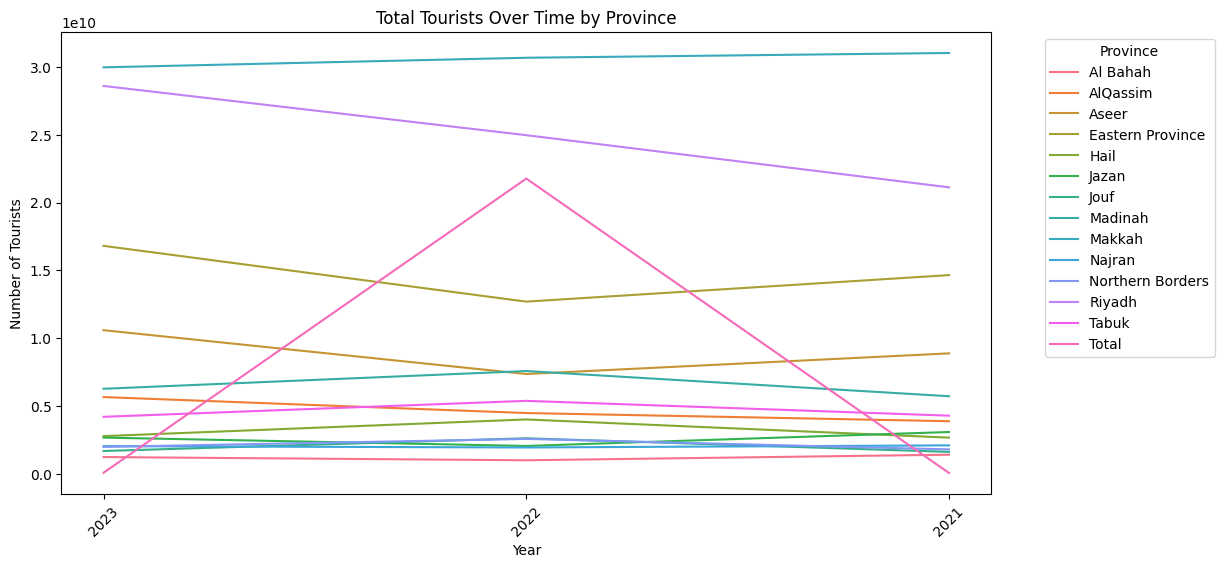

In [136]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=domestics_tourism, x="year", y="Value", hue="Province", estimator="sum", ci=None)
plt.title("Total Tourists Over Time by Province")
plt.xlabel("Year")
plt.ylabel("Number of Tourists")
plt.xticks(rotation=45)
plt.legend(title="Province", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

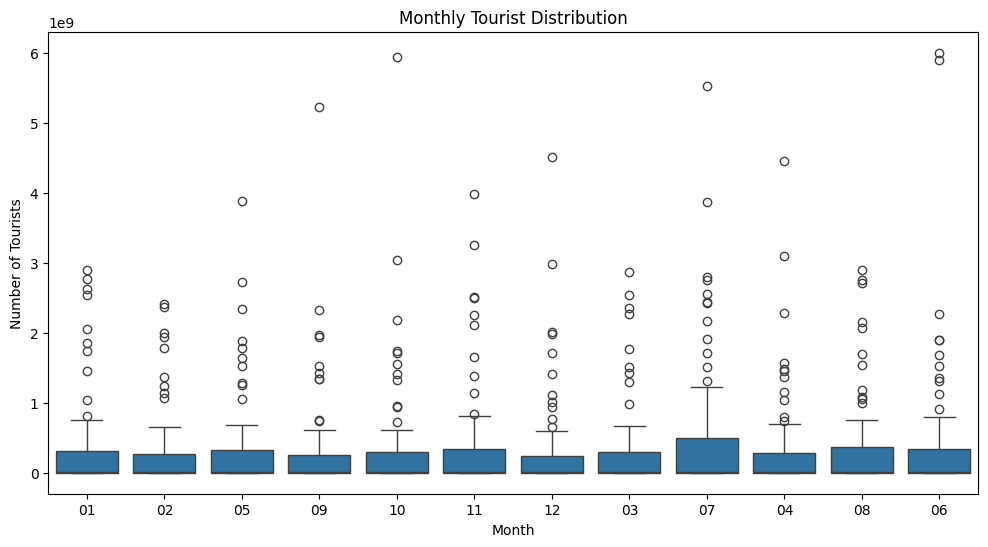

In [137]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=domestics_tourism, x="month", y="Value")
plt.title("Monthly Tourist Distribution")
plt.xlabel("Month")
plt.ylabel("Number of Tourists")
plt.show()

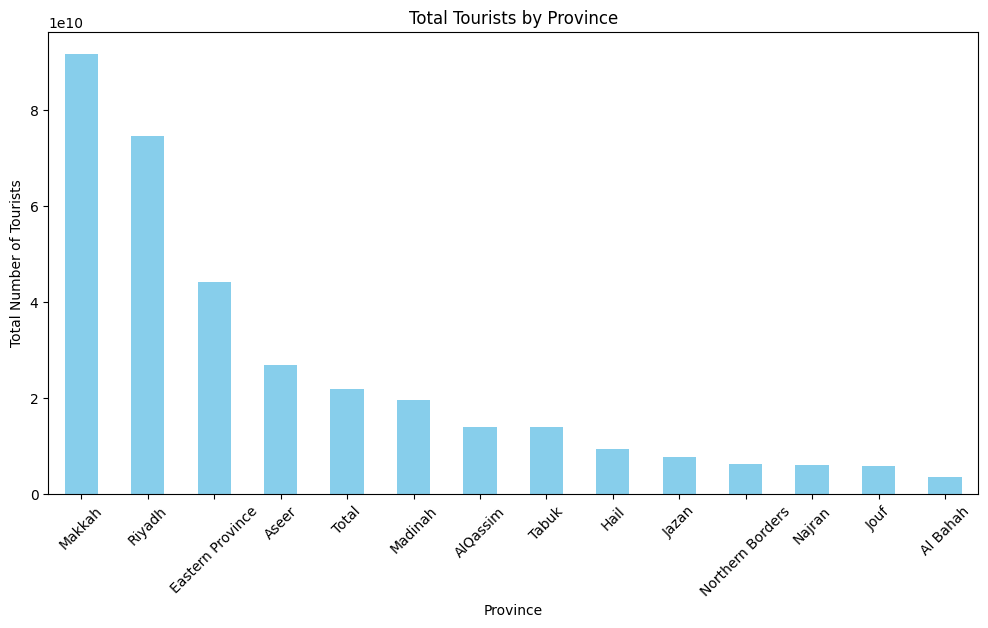

In [138]:
top_provinces = domestics_tourism.groupby("Province")["Value"].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
top_provinces.plot(kind="bar", color="skyblue")
plt.title("Total Tourists by Province")
plt.xlabel("Province")
plt.ylabel("Total Number of Tourists")
plt.xticks(rotation=45)
plt.show()


# Data minning from the dataset

In [139]:
summary_stats = domestics_tourism.describe()
top_5_provinces = domestics_tourism.groupby("Province")["Value"].sum().sort_values(ascending=False).head(5)
yearly_totals = domestics_tourism.groupby("year")["Value"].sum()
peak_year = yearly_totals.idxmax()
peak_year_value = yearly_totals.max()
monthly_avg = domestics_tourism.groupby("month")["Value"].mean()
peak_month = monthly_avg.idxmax()
peak_month_value = monthly_avg.max()
most_common_indicator = domestics_tourism["Indicator"].value_counts().idxmax()

In [140]:
print("Statistical Summary:\n", summary_stats)


Statistical Summary:
               Value
count  9.760000e+02
mean   3.544908e+08
std    7.576030e+08
min    2.016800e+04
25%    2.617720e+05
50%    6.467014e+06
75%    3.283162e+08
max    6.001154e+09


In [141]:
print("Top 5 Provinces:\n", top_5_provinces)


Top 5 Provinces:
 Province
Makkah              9.165512e+10
Riyadh              7.467524e+10
Eastern Province    4.414816e+10
Aseer               2.682673e+10
Total               2.190941e+10
Name: Value, dtype: float64


In [142]:
print(f"Peak Year: {peak_year} with {peak_year_value} tourists")


Peak Year: 2022 with 129100708337.58 tourists


In [143]:
print(f"Peak Month: {peak_month} with {peak_month_value} tourists")


Peak Month: 07 with 529476604.4287655 tourists


In [144]:
print(f"Most Common Indicator: {most_common_indicator}")

Most Common Indicator: Tourists Number (Overnight Visitors)


In [145]:
total_tourists = domestics_tourism[domestics_tourism['Indicator'] == 'Tourists Number (Overnight Visitors)'].groupby('year')['Value'].sum()
total_spending = domestics_tourism[domestics_tourism['Indicator'] == 'Tourists Spending (SAR)'].groupby('year')['Value'].sum()

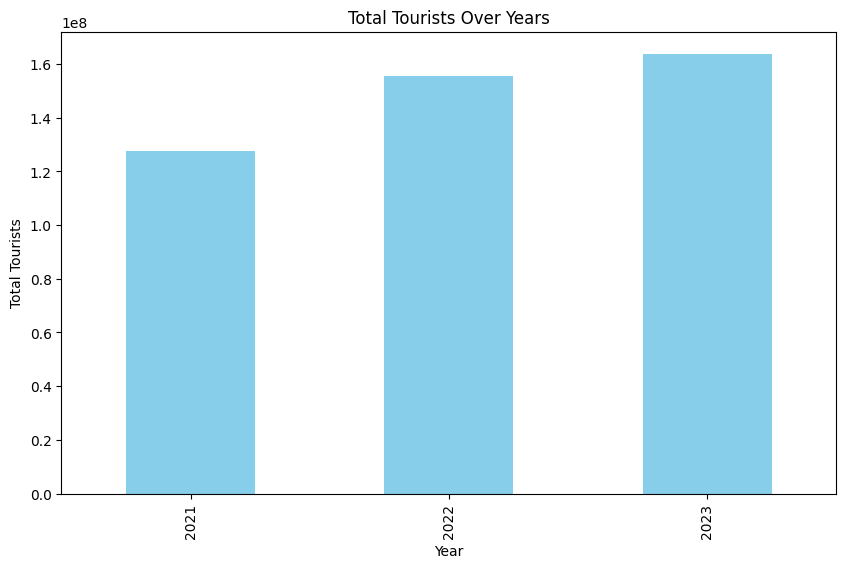

In [146]:
plt.figure(figsize=(10, 6))
total_tourists.plot(kind='bar', color='skyblue')
plt.title('Total Tourists Over Years')
plt.xlabel('Year')
plt.ylabel('Total Tourists')
plt.show()

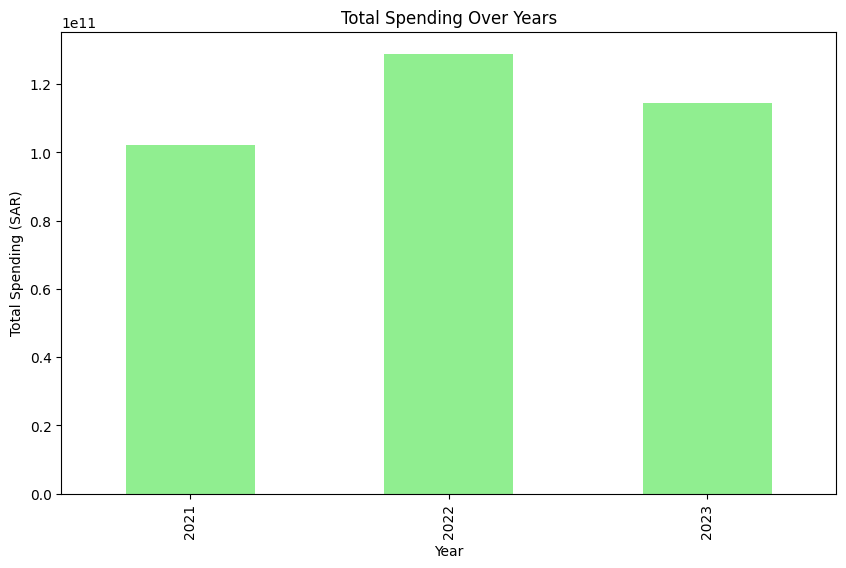

In [147]:
# Plotting Total Spending Over Years
plt.figure(figsize=(10, 6))
total_spending.plot(kind='bar', color='lightgreen')
plt.title('Total Spending Over Years')
plt.xlabel('Year')
plt.ylabel('Total Spending (SAR)')
plt.show()

In [148]:
monthly_tourists = domestics_tourism[domestics_tourism['Indicator'] == 'Tourists Number (Overnight Visitors)'].groupby('month')['Value'].sum()
monthly_spending = domestics_tourism[domestics_tourism['Indicator'] == 'Tourists Spending (SAR)'].groupby('month')['Value'].sum()


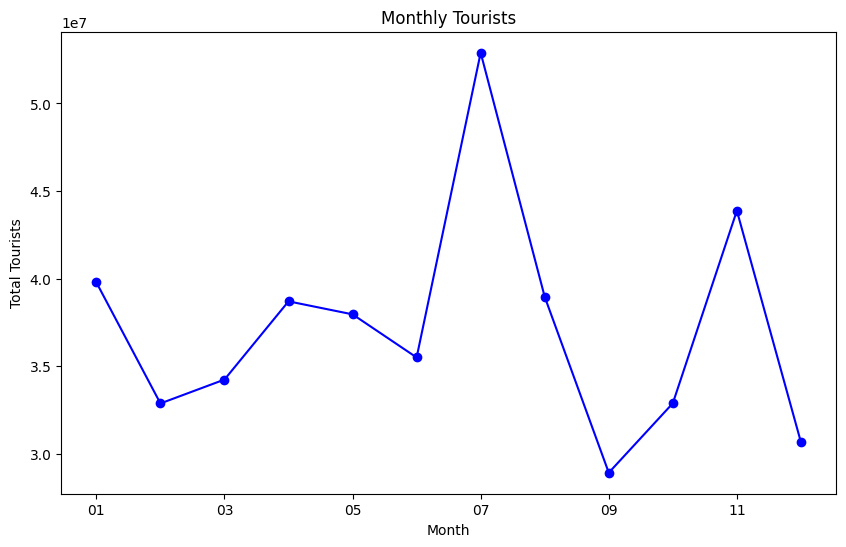

In [149]:
plt.figure(figsize=(10, 6))
monthly_tourists.plot(kind='line', marker='o', color='blue')
plt.title('Monthly Tourists')
plt.xlabel('Month')
plt.ylabel('Total Tourists')
plt.show()



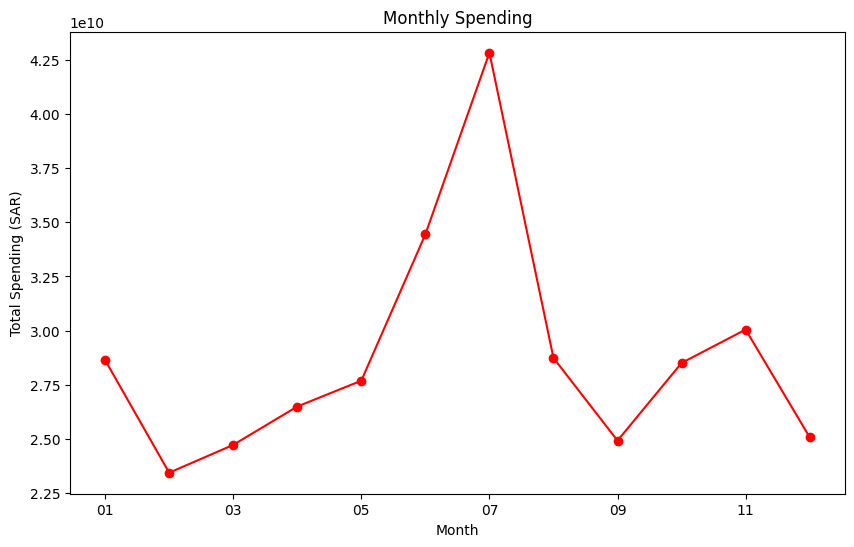

In [150]:
plt.figure(figsize=(10, 6))
monthly_spending.plot(kind='line', marker='o', color='red')
plt.title('Monthly Spending')
plt.xlabel('Month')
plt.ylabel('Total Spending (SAR)')
plt.show()

# data transfromation and Encodeing

In [151]:
numerical_features = domestics_tourism.select_dtypes(include=['int64', 'float64']).columns
categorical_features = domestics_tourism.select_dtypes(include=['object']).columns

In [152]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder , LabelEncoder
from sklearn.compose import ColumnTransformer



In [153]:
numerical_transformer = StandardScaler()
categorical_transformer =OneHotEncoder (handle_unknown='ignore')

In [154]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [155]:
numerical_features

Index(['Value'], dtype='object')

In [156]:
categorical_features

Index(['Indicator', 'Province', 'year', 'month'], dtype='object')

In [157]:
domestics_tourismTF=preprocessor.fit_transform(domestics_tourism)
domestics_tourismTF

<976x32 sparse matrix of type '<class 'numpy.float64'>'
	with 4880 stored elements in Compressed Sparse Row format>

# inbound_tourism Datasets

In [158]:
inbound_tourism.head()

,Date,Indicator,Province,Destination,value
0,2021-March,Tourists Number (Overnight Visitors),Albaha province,Al Bahah,31.000000
1,2023-May,Tourists Number (Overnight Visitors),Albaha province,Al Bahah,1188.000000
2,2023-October,Tourists Number (Overnight Visitors),Albaha province,Al Bahah,1703.000000
3,2022-November,Tourists Number (Overnight Visitors),Albaha province,Al Bahah,123.146793
4,2023-November,Tourists Number (Overnight Visitors),Albaha province,Al Bahah,415.000000


# Data reading

In [159]:
inbound_tourism = pd.read_csv('inbound-tourists-number-and-spending-by-destination-main-cities-2.txt',delimiter=';')
print(len(inbound_tourism))
inbound_tourism.head()

2362


,Date,Indicator,Province,Destination,value
0,2021-March,Tourists Number (Overnight Visitors),Albaha province,Al Bahah,31.000000
1,2023-May,Tourists Number (Overnight Visitors),Albaha province,Al Bahah,1188.000000
2,2023-October,Tourists Number (Overnight Visitors),Albaha province,Al Bahah,1703.000000
3,2022-November,Tourists Number (Overnight Visitors),Albaha province,Al Bahah,123.146793
4,2023-November,Tourists Number (Overnight Visitors),Albaha province,Al Bahah,415.000000


## Handel the data and Split the date into year and month and encode the month

In [160]:
month_dict = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
    'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
}

inbound_tourism['year']=inbound_tourism['Date'].apply(lambda x:str(x).split('-')[0])
inbound_tourism['month']=inbound_tourism['Date'].apply(lambda x:month_dict[str(x).split('-')[1]])
inbound_tourism.drop(['Date','Destination'],axis=1,inplace=True)
inbound_tourism.head()

,Indicator,Province,value,year,month
0,Tourists Number (Overnight Visitors),Albaha province,31.000000,2021,3
1,Tourists Number (Overnight Visitors),Albaha province,1188.000000,2023,5
2,Tourists Number (Overnight Visitors),Albaha province,1703.000000,2023,10
3,Tourists Number (Overnight Visitors),Albaha province,123.146793,2022,11
4,Tourists Number (Overnight Visitors),Albaha province,415.000000,2023,11


## Check null values

In [189]:
inbound_tourism.isna().sum()

Indicator         0
Province          0
value           110
year              0
month             0
tourism type      0
dtype: int64

## drop nulls

In [190]:
inbound_tourism.dropna(inplace=True)

## chech the outliers and drop the outliers

In [192]:
from scipy import stats
inbound_tourism['Z-Score'] = np.abs(stats.zscore(inbound_tourism['value']))

inbound_tourism = inbound_tourism[inbound_tourism['Z-Score'] <= 3].drop(columns=['Z-Score'])
inbound_tourism.head()

,Indicator,Province,value,year,month,tourism type
0,Tourists Number (Overnight Visitors),Albaha province,31.000000,2021,3,inbound_tourism
1,Tourists Number (Overnight Visitors),Albaha province,1188.000000,2023,5,inbound_tourism
2,Tourists Number (Overnight Visitors),Albaha province,1703.000000,2023,10,inbound_tourism
3,Tourists Number (Overnight Visitors),Albaha province,123.146793,2022,11,inbound_tourism
4,Tourists Number (Overnight Visitors),Albaha province,415.000000,2023,11,inbound_tourism


# Data visulization for inbound 

C:\Users\mahmo\AppData\Local\Temp\ipykernel_25628\3975446299.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=inbound_tourism, x="year", y="value", hue="Province", estimator="sum", ci=None)


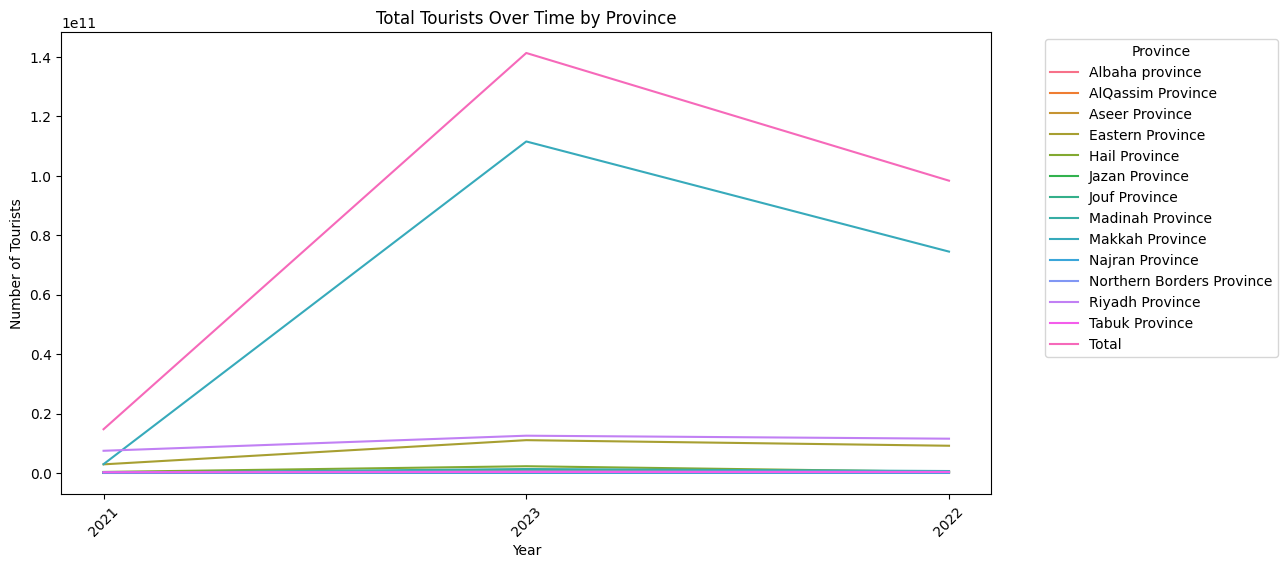

In [161]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=inbound_tourism, x="year", y="value", hue="Province", estimator="sum", ci=None)
plt.title("Total Tourists Over Time by Province")
plt.xlabel("Year")
plt.ylabel("Number of Tourists")
plt.xticks(rotation=45)
plt.legend(title="Province", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

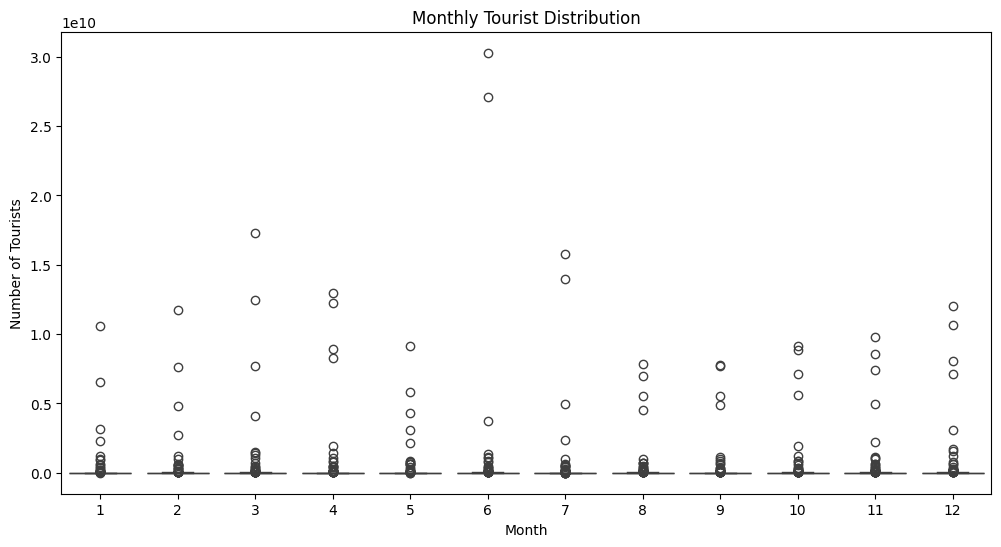

In [162]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=inbound_tourism, x="month", y="value")
plt.title("Monthly Tourist Distribution")
plt.xlabel("Month")
plt.ylabel("Number of Tourists")
plt.show()


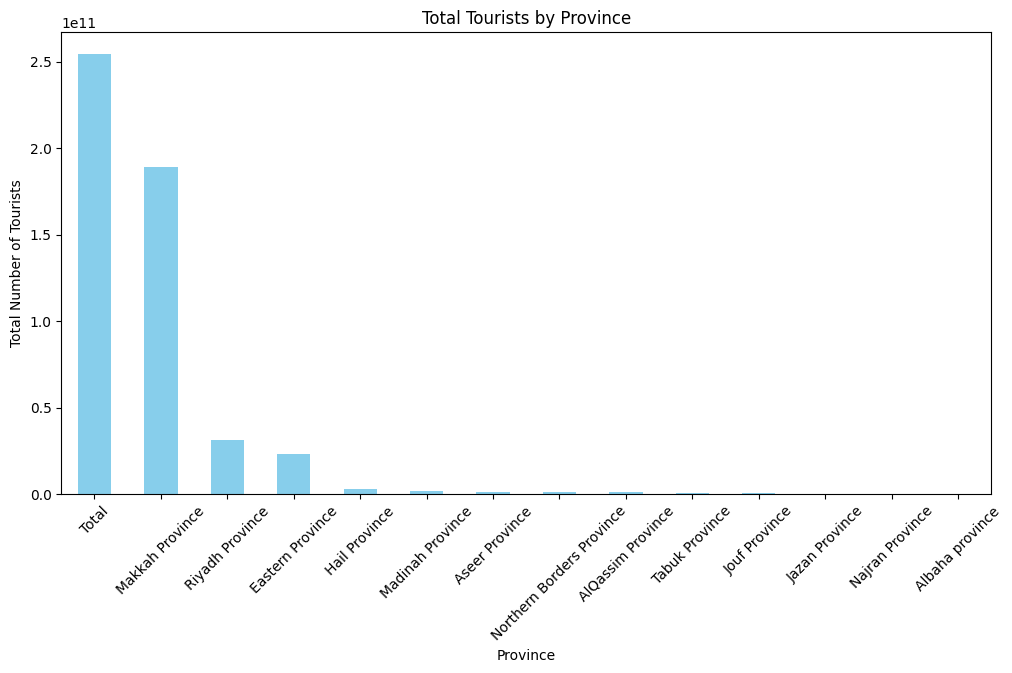

In [163]:
top_provinces = inbound_tourism.groupby("Province")["value"].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
top_provinces.plot(kind="bar", color="skyblue")
plt.title("Total Tourists by Province")
plt.xlabel("Province")
plt.ylabel("Total Number of Tourists")
plt.xticks(rotation=45)
plt.show()

In [164]:
summary_stats = inbound_tourism.describe()
top_5_provinces = inbound_tourism.groupby("Province")["value"].sum().sort_values(ascending=False).head(5)
yearly_totals = inbound_tourism.groupby("year")["value"].sum()
peak_year = yearly_totals.idxmax()
peak_year_value = yearly_totals.max()
monthly_avg = inbound_tourism.groupby("month")["value"].mean()
peak_month = monthly_avg.idxmax()
peak_month_value = monthly_avg.max()
most_common_indicator = inbound_tourism["Indicator"].value_counts().idxmax()

In [165]:
print("Statistical Summary:\n", summary_stats)


Statistical Summary:
               value        month
count  2.252000e+03  2362.000000
mean   2.258363e+08     6.620660
std    1.468843e+09     3.455662
min   -1.000023e-02     1.000000
25%    1.725250e+03     4.000000
50%    1.065700e+05     7.000000
75%    7.834966e+06    10.000000
max    3.029017e+10    12.000000


In [166]:
print("Top 5 Provinces:\n", top_5_provinces)


Top 5 Provinces:
 Province
Total               2.542917e+11
Makkah Province     1.889236e+11
Riyadh Province     3.155467e+10
Eastern Province    2.311389e+10
Hail Province       3.007326e+09
Name: value, dtype: float64


In [167]:
print(f"Peak Year: {peak_year} with {peak_year_value} tourists")


Peak Year: 2023 with 282522804708.18 tourists


In [168]:
print(f"Peak Month: {peak_month} with {peak_month_value} tourists")


Peak Month: 6 with 380386419.8979885 tourists


In [169]:
print(f"Most Common Indicator: {most_common_indicator}")

Most Common Indicator: Tourists Spending (SAR)


In [170]:
total_tourists = inbound_tourism[inbound_tourism['Indicator'] == 'Tourists Number (Overnight Visitors)'].groupby('year')['value'].sum()
total_spending = inbound_tourism[inbound_tourism['Indicator'] == 'Tourists Spending (SAR)'].groupby('year')['value'].sum()

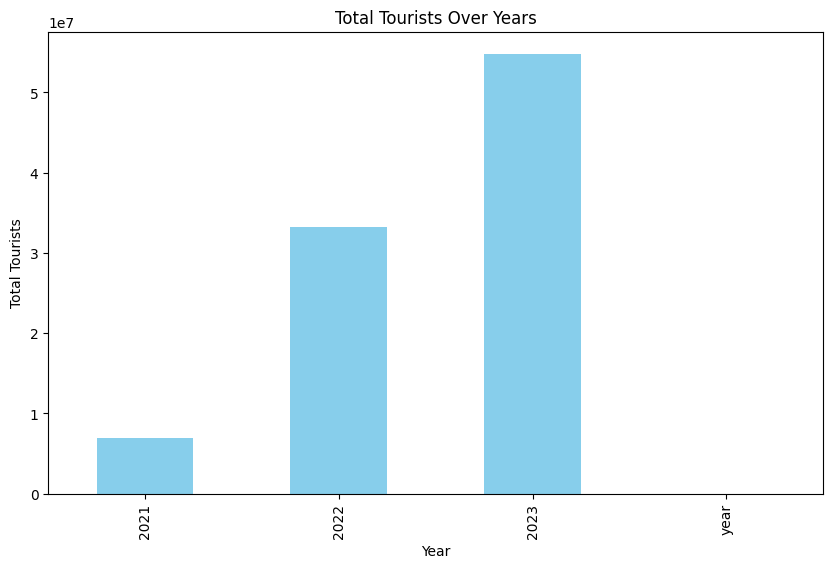

In [171]:
plt.figure(figsize=(10, 6))
total_tourists.plot(kind='bar', color='skyblue')
plt.title('Total Tourists Over Years')
plt.xlabel('Year')
plt.ylabel('Total Tourists')
plt.show()

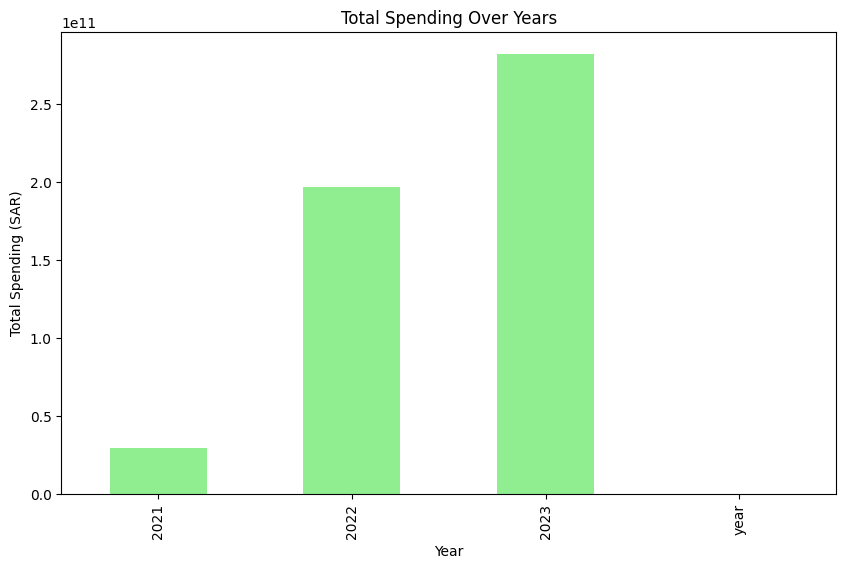

In [172]:
plt.figure(figsize=(10, 6))
total_spending.plot(kind='bar', color='lightgreen')
plt.title('Total Spending Over Years')
plt.xlabel('Year')
plt.ylabel('Total Spending (SAR)')
plt.show()

In [173]:
monthly_tourists = inbound_tourism[inbound_tourism['Indicator'] == 'Tourists Number (Overnight Visitors)'].groupby('month')['value'].sum()
monthly_spending = inbound_tourism[inbound_tourism['Indicator'] == 'Tourists Spending (SAR)'].groupby('month')['value'].sum()


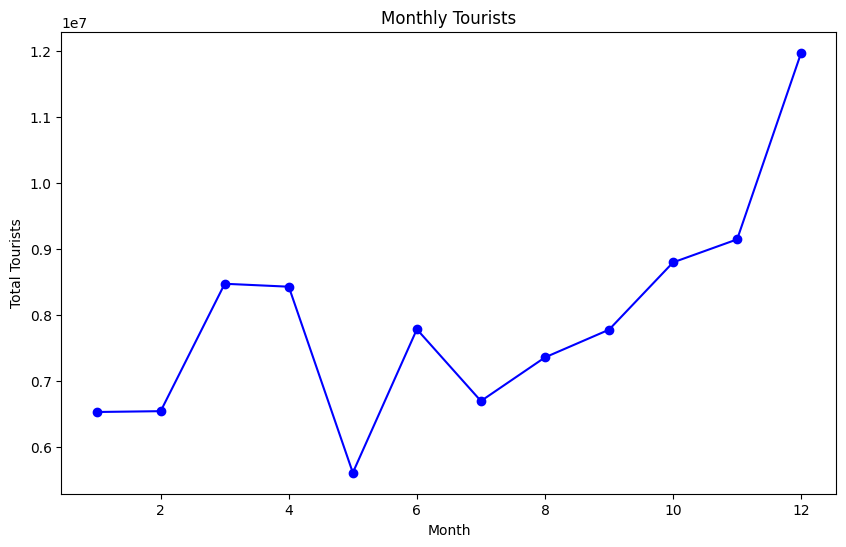

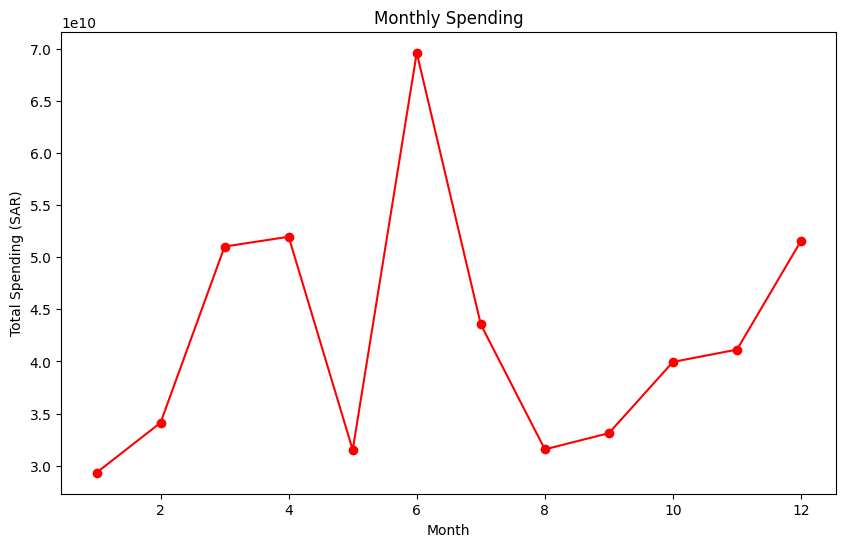

In [174]:
plt.figure(figsize=(10, 6))
monthly_tourists.plot(kind='line', marker='o', color='blue')
plt.title('Monthly Tourists')
plt.xlabel('Month')
plt.ylabel('Total Tourists')
plt.show()

plt.figure(figsize=(10, 6))
monthly_spending.plot(kind='line', marker='o', color='red')
plt.title('Monthly Spending')
plt.xlabel('Month')
plt.ylabel('Total Spending (SAR)')
plt.show()

# Transformation for inbounds touism Dataset

In [193]:
numerical_features = inbound_tourism.select_dtypes(include=['int64', 'float64']).columns
categorical_features = inbound_tourism.select_dtypes(include=['object']).columns

In [175]:
domestics_tourism['tourism type']='domestics_tourism'
inbound_tourism['tourism type']='inbound_tourism'

In [194]:
numerical_transformer = StandardScaler()
categorical_transformer =OneHotEncoder (handle_unknown='ignore')

In [195]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [196]:
inbound_tourismTF=preprocessor.fit_transform(domestics_tourism)
inbound_tourismTF

<976x22 sparse matrix of type '<class 'numpy.float64'>'
	with 5856 stored elements in Compressed Sparse Row format>

In [176]:
inbound_tourism.head()

,Indicator,Province,value,year,month,tourism type
0,Tourists Number (Overnight Visitors),Albaha province,31.000000,2021,3,inbound_tourism
1,Tourists Number (Overnight Visitors),Albaha province,1188.000000,2023,5,inbound_tourism
2,Tourists Number (Overnight Visitors),Albaha province,1703.000000,2023,10,inbound_tourism
3,Tourists Number (Overnight Visitors),Albaha province,123.146793,2022,11,inbound_tourism
4,Tourists Number (Overnight Visitors),Albaha province,415.000000,2023,11,inbound_tourism


In [177]:
domestics_tourism['month']=domestics_tourism['month'].astype('int64')
inbound_tourism['month']=inbound_tourism['month'].astype('int64')

In [178]:
inbound_tourism.head()

,Indicator,Province,value,year,month,tourism type
0,Tourists Number (Overnight Visitors),Albaha province,31.000000,2021,3,inbound_tourism
1,Tourists Number (Overnight Visitors),Albaha province,1188.000000,2023,5,inbound_tourism
2,Tourists Number (Overnight Visitors),Albaha province,1703.000000,2023,10,inbound_tourism
3,Tourists Number (Overnight Visitors),Albaha province,123.146793,2022,11,inbound_tourism
4,Tourists Number (Overnight Visitors),Albaha province,415.000000,2023,11,inbound_tourism


In [179]:
inbound_tourism = inbound_tourism.rename(columns={"Value": "value"}) 
domestics_tourism = domestics_tourism.rename(columns={"Value": "value"}) 

In [180]:
inbound_tourism.head()

,Indicator,Province,value,year,month,tourism type
0,Tourists Number (Overnight Visitors),Albaha province,31.000000,2021,3,inbound_tourism
1,Tourists Number (Overnight Visitors),Albaha province,1188.000000,2023,5,inbound_tourism
2,Tourists Number (Overnight Visitors),Albaha province,1703.000000,2023,10,inbound_tourism
3,Tourists Number (Overnight Visitors),Albaha province,123.146793,2022,11,inbound_tourism
4,Tourists Number (Overnight Visitors),Albaha province,415.000000,2023,11,inbound_tourism


# merge 2 dataframes

In [181]:
dataFrame=pd.merge(inbound_tourism,domestics_tourism,how='outer')
print(len(dataFrame))
dataFrame.head()

3338


,Indicator,Province,value,year,month,tourism type
0,Tourists Number (Overnight Visitors),Albaha province,31.000000,2021,3,inbound_tourism
1,Tourists Number (Overnight Visitors),Albaha province,1188.000000,2023,5,inbound_tourism
2,Tourists Number (Overnight Visitors),Albaha province,1703.000000,2023,10,inbound_tourism
3,Tourists Number (Overnight Visitors),Albaha province,123.146793,2022,11,inbound_tourism
4,Tourists Number (Overnight Visitors),Albaha province,415.000000,2023,11,inbound_tourism


In [182]:
dataFrame.to_csv("merdedData.csv")

## some visulization

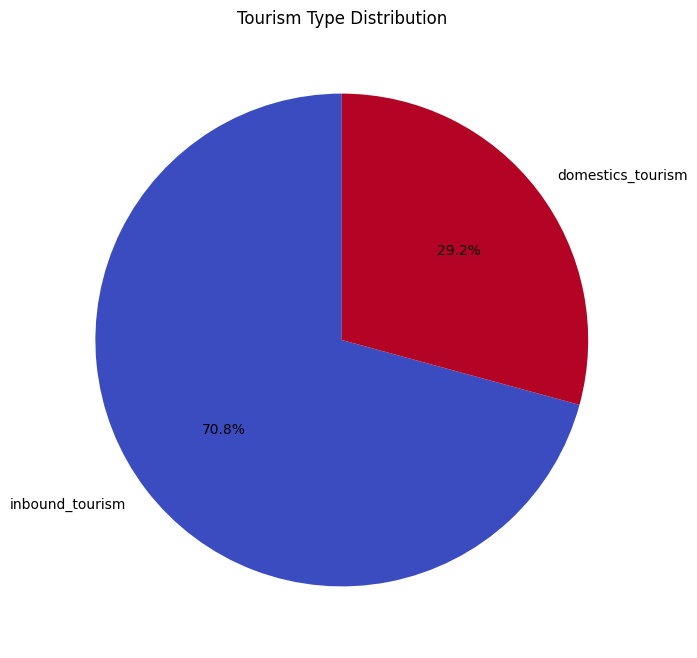

In [ ]:
plt.figure(figsize=(8, 8))
dataFrame['tourism type'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='coolwarm')
plt.title("Tourism Type Distribution")
plt.ylabel('')
plt.show()

C:\Users\mahmo\AppData\Local\Temp\ipykernel_25628\1053040903.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tourism_summary.index, y=tourism_summary.values, palette='coolwarm')


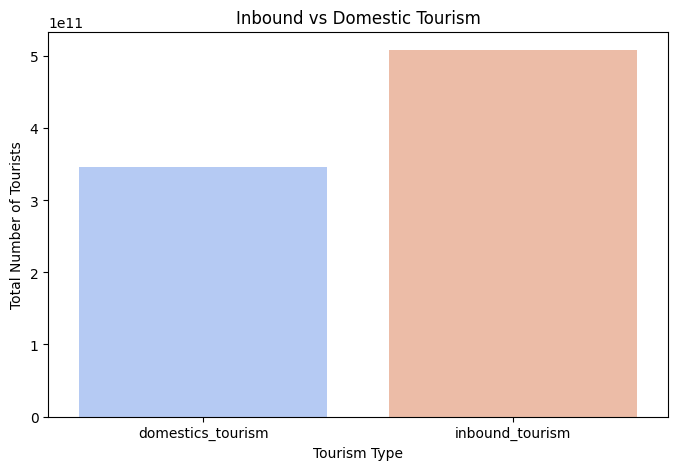

In [ ]:
tourism_summary = dataFrame.groupby("tourism type")["value"].sum()

plt.figure(figsize=(8, 5))
sns.barplot(x=tourism_summary.index, y=tourism_summary.values, palette='coolwarm')
plt.title("Inbound vs Domestic Tourism")
plt.xlabel("Tourism Type")
plt.ylabel("Total Number of Tourists")
plt.show()


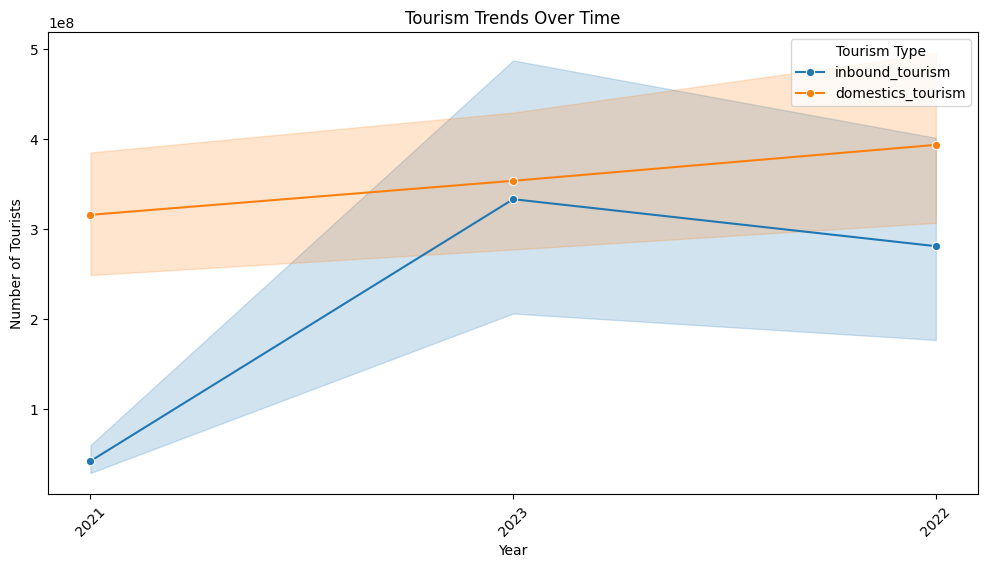

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=dataFrame, x='year', y='value', hue='tourism type', marker='o')
plt.title("Tourism Trends Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Tourists")
plt.xticks(rotation=45)
plt.legend(title="Tourism Type")
plt.show()

C:\Users\mahmo\AppData\Local\Temp\ipykernel_25628\3195780723.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=dataFrame, x='month', y='value', hue='tourism type', ci=None)


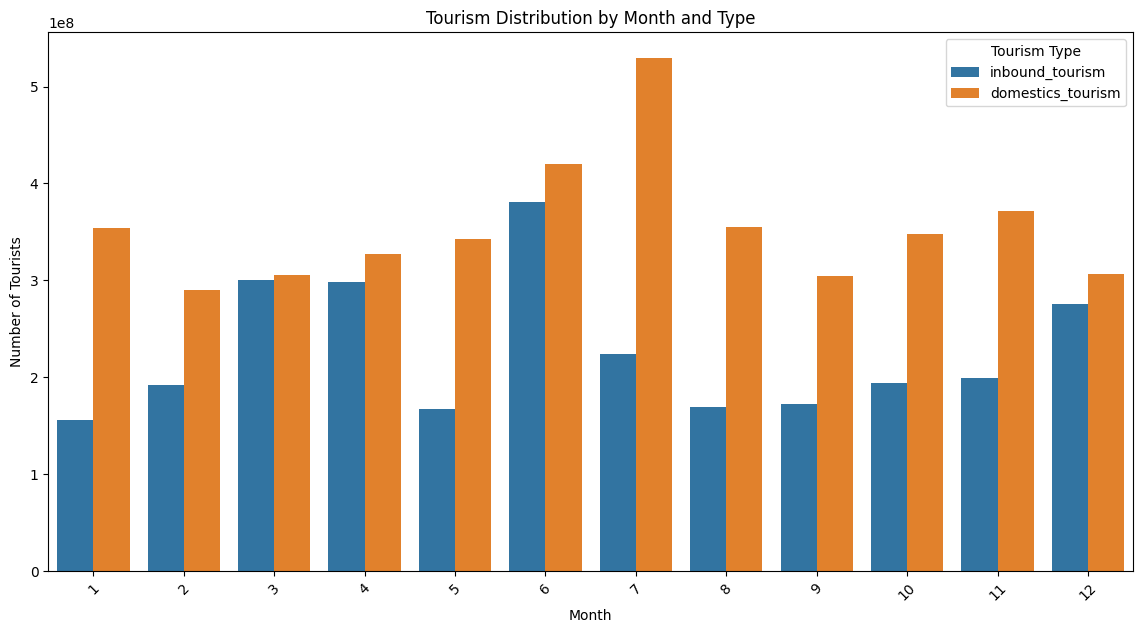

In [ ]:
plt.figure(figsize=(14, 7))
sns.barplot(data=dataFrame, x='month', y='value', hue='tourism type', ci=None)
plt.title("Tourism Distribution by Month and Type")
plt.xlabel("Month")
plt.ylabel("Number of Tourists")
plt.xticks(rotation=45)
plt.legend(title="Tourism Type")
plt.show()

<Figure size 1200x600 with 0 Axes>

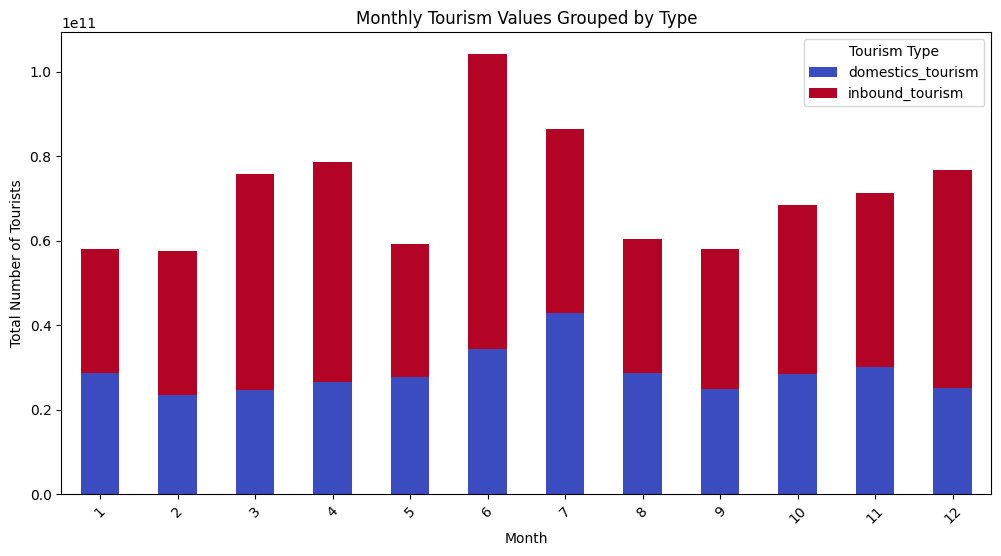

In [ ]:
# Aggregate values by month and tourism type
monthly_tourism = dataFrame.groupby(['month', 'tourism type'])['value'].sum().unstack()

plt.figure(figsize=(12, 6))
monthly_tourism.plot(kind='bar', stacked=True, colormap='coolwarm', figsize=(12,6))
plt.title("Monthly Tourism Values Grouped by Type")
plt.xlabel("Month")
plt.ylabel("Total Number of Tourists")
plt.xticks(rotation=45)
plt.legend(title="Tourism Type")
plt.show()


c:\Users\mahmo\anaconda3\envs\workDeep\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


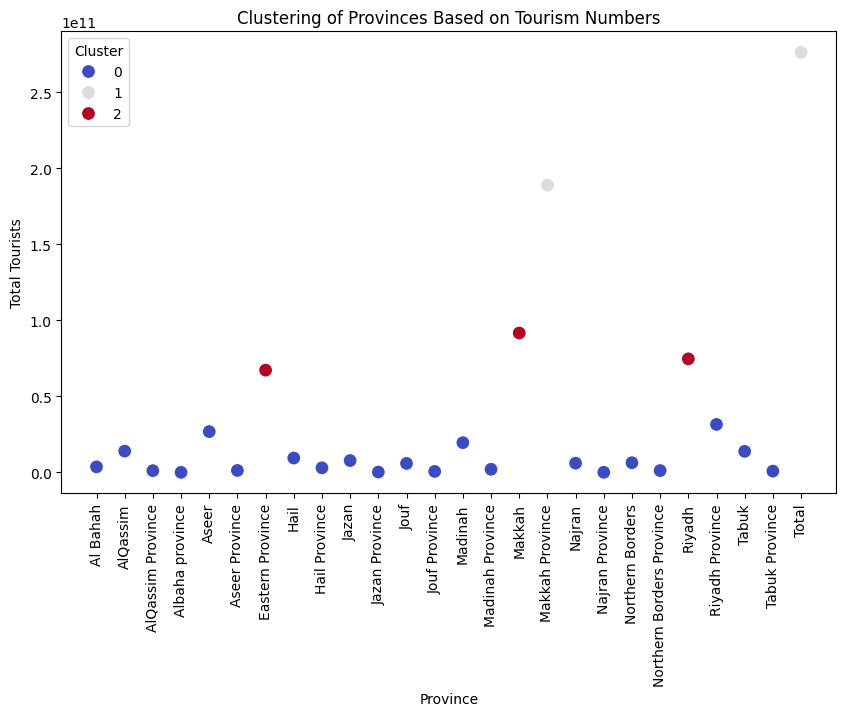

In [ ]:
import seaborn as sns
from sklearn.cluster import KMeans
province_tourism = dataFrame.groupby("Province")["value"].sum().reset_index()

# Applying K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
province_tourism["Cluster"] = kmeans.fit_predict(province_tourism[["value"]])

plt.figure(figsize=(10, 6))
sns.scatterplot(data=province_tourism, x="Province", y="value", hue="Cluster", palette="coolwarm", s=100)
plt.title("Clustering of Provinces Based on Tourism Numbers")
plt.xlabel("Province")
plt.ylabel("Total Tourists")
plt.xticks(rotation=90)
plt.legend(title="Cluster")
plt.show()